In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('New_Data.csv')
data.count()

Living_Space(sqft)          1197
No_Of_Bedrooms              1196
No_Of_Bathrooms              858
Condition(on scale of 5)    1197
Year_Build                  1198
Swimming Pool               1197
Location                    1196
Price                       1196
dtype: int64

In [3]:
#finding the missing values percentage
data.isnull().sum()/len(data)*100

Living_Space(sqft)           0.083472
No_Of_Bedrooms               0.166945
No_Of_Bathrooms             28.380634
Condition(on scale of 5)     0.083472
Year_Build                   0.000000
Swimming Pool                0.083472
Location                     0.166945
Price                        0.166945
dtype: float64

In [4]:
data.isnull().sum()

Living_Space(sqft)            1
No_Of_Bedrooms                2
No_Of_Bathrooms             340
Condition(on scale of 5)      1
Year_Build                    0
Swimming Pool                 1
Location                      2
Price                         2
dtype: int64

In [5]:
data=data.dropna()

In [6]:
data.isnull().sum()

Living_Space(sqft)          0
No_Of_Bedrooms              0
No_Of_Bathrooms             0
Condition(on scale of 5)    0
Year_Build                  0
Swimming Pool               0
Location                    0
Price                       0
dtype: int64

In [7]:
data.var()

Living_Space(sqft)          4.673652e+05
No_Of_Bedrooms              7.705346e-01
No_Of_Bathrooms             5.630983e-01
Condition(on scale of 5)    4.643589e-01
Year_Build                  7.673710e+02
Price                       1.255268e+11
dtype: float64

In [8]:
df=data.drop('Price',axis=1)

In [9]:
df.corr()

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build
Living_Space(sqft),1.000000,0.398497,0.586666,-0.057746,0.352002
No_Of_Bedrooms,0.398497,1.000000,0.511915,0.054657,0.154893
No_Of_Bathrooms,0.586666,0.511915,1.000000,-0.091180,0.511043
Condition(on scale of 5),-0.057746,0.054657,-0.091180,1.000000,-0.296055
Year_Build,0.352002,0.154893,0.511043,-0.296055,1.000000


In [10]:
data.head()

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Swimming Pool,Location,Price
0,1340.0,3.0,1.00,3.0,1955,Yes,Bangalore,221900.0
342,1660.0,4.0,1.75,4.0,1991,Yes,Chennai,309600.0
343,2380.0,4.0,2.50,3.0,2002,No,Chennai,552250.0
344,1020.0,4.0,1.00,3.0,1943,Yes,Chennai,165000.0
345,1020.0,4.0,1.00,3.0,1943,Yes,Chennai,239900.0


In [77]:
data.shape

(857, 8)

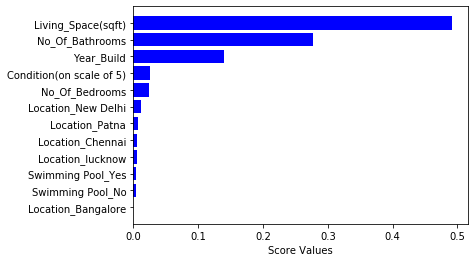

In [22]:
#random forest
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
data1=data.drop('Price',axis=1)
df=pd.get_dummies(data1)
model.fit(df,data.Price)
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # top 20 features
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Score Values')
plt.show()

In [81]:
#backward feature elimination
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
data['Location']=pd.get_dummies(data.Location)
data['Swimming Pool']=pd.get_dummies(data['Swimming Pool'])
x= data.drop(columns = ['Price'],axis=1)
y = data['Price']
CreateModel= LinearRegression()
CreateModel_RFE= RFE(CreateModel, 7)
CreateModel_RFE= CreateModel_RFE.fit_transform(x,y)
import numpy as np
import statsmodels.regression.linear_model as sm 
x = np.append(arr= np.ones((857, 1)).astype(int),values = x, axis = 1) 
x_opt = x[:, [0, 1, 2, 3, 4, 5]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

C:\Users\gautam.y.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     162.2
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          4.42e-121
Time:                        16:59:40   Log-Likelihood:                -11879.
No. Observations:                 857   AIC:                         2.377e+04
Df Residuals:                     851   BIC:                         2.380e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.477e+06   7.63e+05      9.802      0.000    5.98e+06    8.97e+06
x1           268.9699     15.931     16.883      0.000     237.701     300.239
x2         -2.418e+04   1.18e+04     -2.045      0.041   -4.74e+04    -975.544
x3          1.869e+05   1.71e+04     10.958      0.000    1.53e+05     2.2e+05
x4          2.115e+04   1.34e+04      1.575      0.116   -5213.300    4.75e+04
x5         -3991.4850    385.857    -10.344      0.000   -4748.828   -3234.142
==============================================================================
Omnibus:                      982.478   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152177.980
Skew:                           5.334   Prob(JB):                         0.00
Kurtosis:                      67.404   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     162.2
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          4.42e-121
Time:                        16:59:27   Log-Likelihood:                -11879.
No. Observations:                 857   AIC:                         2.377e+04
Df Residuals:                     851   BIC:                         2.380e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.477e+06   7.63e+05      9.802      0.000    5.98e+06    8.97e+06
x1           268.9699     15.931     16.883      0.000     237.701     300.239
x2         -2.418e+04   1.18e+04     -2.045      0.041   -4.74e+04    -975.544
x3          1.869e+05   1.71e+04     10.958      0.000    1.53e+05     2.2e+05
x4          2.115e+04   1.34e+04      1.575      0.116   -5213.300    4.75e+04
x5         -3991.4850    385.857    -10.344      0.000   -4748.828   -3234.142
==============================================================================
Omnibus:                      982.478   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152177.980
Skew:                           5.334   Prob(JB):                         0.00
Kurtosis:                      67.404   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
from sklearn.feature_selection import f_regression
forward = f_regression(df,data.Price)
attributes = [ ]
for i in range(0,len(df.columns)-1):
    if forward[0][i] >=5:
       attributes.append(df.columns[i])
attributes

['Living_Space(sqft)', 'No_Of_Bedrooms', 'No_Of_Bathrooms']